In [13]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import data_manager as dm
import config as cg

# Aclaracion
Este jupyter notebook no es parte del repositorio y solo esta para propositos evaluativos, que puedan cargar y observar como funciona esto, por falta de tiempo no se pudo experimentar propiamente las funciones requeridas. 

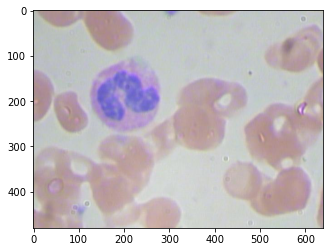

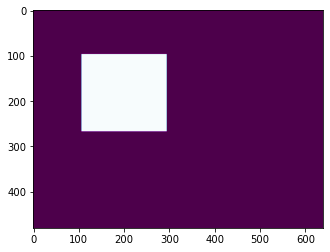

In [3]:


data_loader = dm.image_loader(cg.images_folder, cg.bounding_boxes, cg.train_txt, cg.val_txt, cg.test_txt)
data_loader.set_test_mode()
index = 5
img = data_loader.get_image(index)
# print("shape: ",img.shape)
fig = plt.imshow(img)
plt.show()
mask = data_loader.get_mask(index)
# print("shape: ",img.shape)
fig = plt.imshow(mask,cmap=plt.cm.BuPu_r)
plt.show()


In [6]:
def load_element(path_save, name):
    file = open(path_save + '/' + name, 'rb')
    element = pickle.load(file)
    file.close()
    return element

path = 'models'
name = 'population_{:d}_{:d}.pickle'.format(1,1)
population = load_element(path,name)
best_filter = population.get_best_individual()


In [7]:
filter_procesor = dm.Filter_processor(loader = data_loader)
filters = best_filter.get_filters()
mean = best_filter.mean
std = best_filter.var
output_mask = filter_procesor.predict_img(filters,mean,std,index)

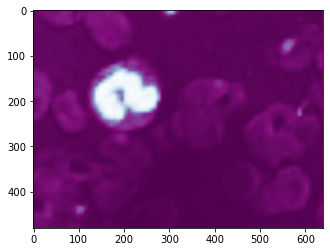

In [8]:
fig = plt.imshow(output_mask.reshape(480, 640),cmap=plt.cm.BuPu_r)
plt.show()

## Map of heat parameters

In [16]:
fitness = np.empty([3,3])
img_manager = dm.Filter_processor()

In [20]:
path_save = 'models'
for mut in range(3):
    for pop in range(3):
        print('ind_{:d}_{:d}.pickle'.format(mut,pop))
        name_ind = 'ind_{:d}_{:d}.pickle'.format(mut,pop)
        file = open(path_save+'/'+name_ind, 'rb')
        individual = pickle.load(file)
        file.close()
        individual.fitness(img_manager)
        fitness[mut,pop] = individual.get_fitness()
        
        

ind_0_0.pickle
ind_0_1.pickle
ind_0_2.pickle
ind_1_0.pickle
ind_1_1.pickle
ind_1_2.pickle
ind_2_0.pickle
ind_2_1.pickle
ind_2_2.pickle


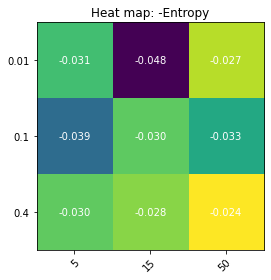

In [29]:
##  population : [5,15,50]
##  mutation: [0.01,0.1,0.5]
import numpy as np
import matplotlib.pyplot as plt
# sphinx_gallery_thumbnail_number = 2

mutation = ["0.01", "0.1", "0.4"]
population = ["5", "15",'50']



fig, ax = plt.subplots()
im = ax.imshow(fitness)

# We want to show all ticks...
ax.set_xticks(np.arange(len(population)))
ax.set_yticks(np.arange(len(mutation)))
# ... and label them with the respective list entries
ax.set_xticklabels(population)
ax.set_yticklabels(mutation)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(mutation)):
    for j in range(len(population)):
        text = ax.text(j, i, '{:.3f}'.format(fitness[i, j]),
                       ha="center", va="center", color="w")

ax.set_title("Heat map: -Entropy")
fig.tight_layout()
plt.show()